## House Prices Dataset

In [652]:
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)
import pandas as pd
import matplotlib.pyplot as plt

train = pd.read_csv('./dataset/train.csv', sep=',')
test = pd.read_csv('./dataset/test.csv', sep=',')


In [653]:
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [654]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [655]:
tmp_na = train.isna().sum()/len(train)*100

print(tmp_na)

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64


In [656]:
tmp_na[tmp_na > 50]

Alley          93.767123
MasVnrType     59.726027
PoolQC         99.520548
Fence          80.753425
MiscFeature    96.301370
dtype: float64

In [657]:
drop_columns = tmp_na[tmp_na > 50].index.tolist()
drop_columns

['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature']

In [658]:
train.drop(columns=drop_columns, inplace=True)

In [659]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [660]:
manquante = train.isna().sum()

manquante[manquante > 0].index.tolist()

['LotFrontage',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [661]:
data_manquante = train.isna().any()[train.isna().any() == True].index.tolist()
data_manquante


['LotFrontage',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [662]:
train[data_manquante].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   MasVnrArea    1452 non-null   float64
 2   BsmtQual      1423 non-null   object 
 3   BsmtCond      1423 non-null   object 
 4   BsmtExposure  1422 non-null   object 
 5   BsmtFinType1  1423 non-null   object 
 6   BsmtFinType2  1422 non-null   object 
 7   Electrical    1459 non-null   object 
 8   FireplaceQu   770 non-null    object 
 9   GarageType    1379 non-null   object 
 10  GarageYrBlt   1379 non-null   float64
 11  GarageFinish  1379 non-null   object 
 12  GarageQual    1379 non-null   object 
 13  GarageCond    1379 non-null   object 
dtypes: float64(3), object(11)
memory usage: 159.8+ KB


In [663]:
# train['LotFrontage'].fillna(train['LotFrontage'].median(), inplace=True)
train['LotFrontage'].fillna(train['LotFrontage'].median(), inplace=True)

In [664]:
train['LotFrontage'].sum()

102001.0

In [665]:
train['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

<Axes: >

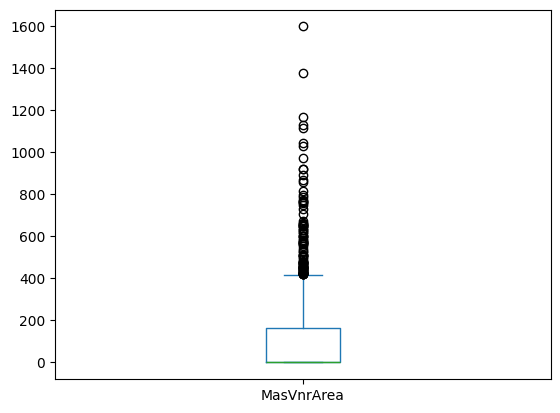

In [666]:
train['MasVnrArea'].plot.box()

In [667]:
train['MasVnrArea'].fillna(0, inplace=True)

In [668]:
train['MasVnrArea'].isna().sum()

0

In [669]:
train['BsmtQual'].mode()

0    TA
Name: BsmtQual, dtype: object

In [670]:
train['BsmtQual'].value_counts()

BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64

In [671]:
train['BsmtQual'].ffill(inplace=True)
train['BsmtQual'].isna().sum()

0

In [672]:
train.BsmtQual.unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

# EXO

In [673]:
train['YearBuilt'].isna().sum()


0

In [674]:
f_quantile = train['YearBuilt'].quantile(0.25)
quantile = train['YearBuilt'].quantile(0.5)
l_quantile = train['YearBuilt'].quantile(0.75)

print(f_quantile, quantile, l_quantile)



1954.0 1973.0 2000.0


In [675]:
train['BsmtQual'] = train.YearBuilt.apply(lambda x: 'Po' if x < f_quantile else ('Fa' if (x > f_quantile and x < quantile) else ('TA' if (x > quantile and x < l_quantile) else ('Good' if (x>l_quantile) else 'TA'))))

In [676]:
train.isna().sum()[train.isna().sum() >0]

BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [677]:
train.drop('FireplaceQu', axis=1, inplace=True)

In [678]:
train.Electrical.mode()

0    SBrkr
Name: Electrical, dtype: object

In [679]:
train['Electrical'].fillna(train.Electrical.mode()[0], inplace=True)

In [680]:
train.Electrical.value_counts()

Electrical
SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

In [681]:
train.dropna(axis=0, inplace=True)

In [682]:
train.shape

(1347, 75)

In [683]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1347 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1347 non-null   int64  
 1   MSSubClass     1347 non-null   int64  
 2   MSZoning       1347 non-null   object 
 3   LotFrontage    1347 non-null   float64
 4   LotArea        1347 non-null   int64  
 5   Street         1347 non-null   object 
 6   LotShape       1347 non-null   object 
 7   LandContour    1347 non-null   object 
 8   Utilities      1347 non-null   object 
 9   LotConfig      1347 non-null   object 
 10  LandSlope      1347 non-null   object 
 11  Neighborhood   1347 non-null   object 
 12  Condition1     1347 non-null   object 
 13  Condition2     1347 non-null   object 
 14  BldgType       1347 non-null   object 
 15  HouseStyle     1347 non-null   object 
 16  OverallQual    1347 non-null   int64  
 17  OverallCond    1347 non-null   int64  
 18  YearBuilt    

In [684]:
cat_columns = [col for col in train.columns if train[col].dtype == 'object']

cat_columns

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [685]:
from sklearn.preprocessing import LabelEncoder


for col in cat_columns:
    le = LabelEncoder()
    train[col+'_le'] = le.fit_transform(train[col])


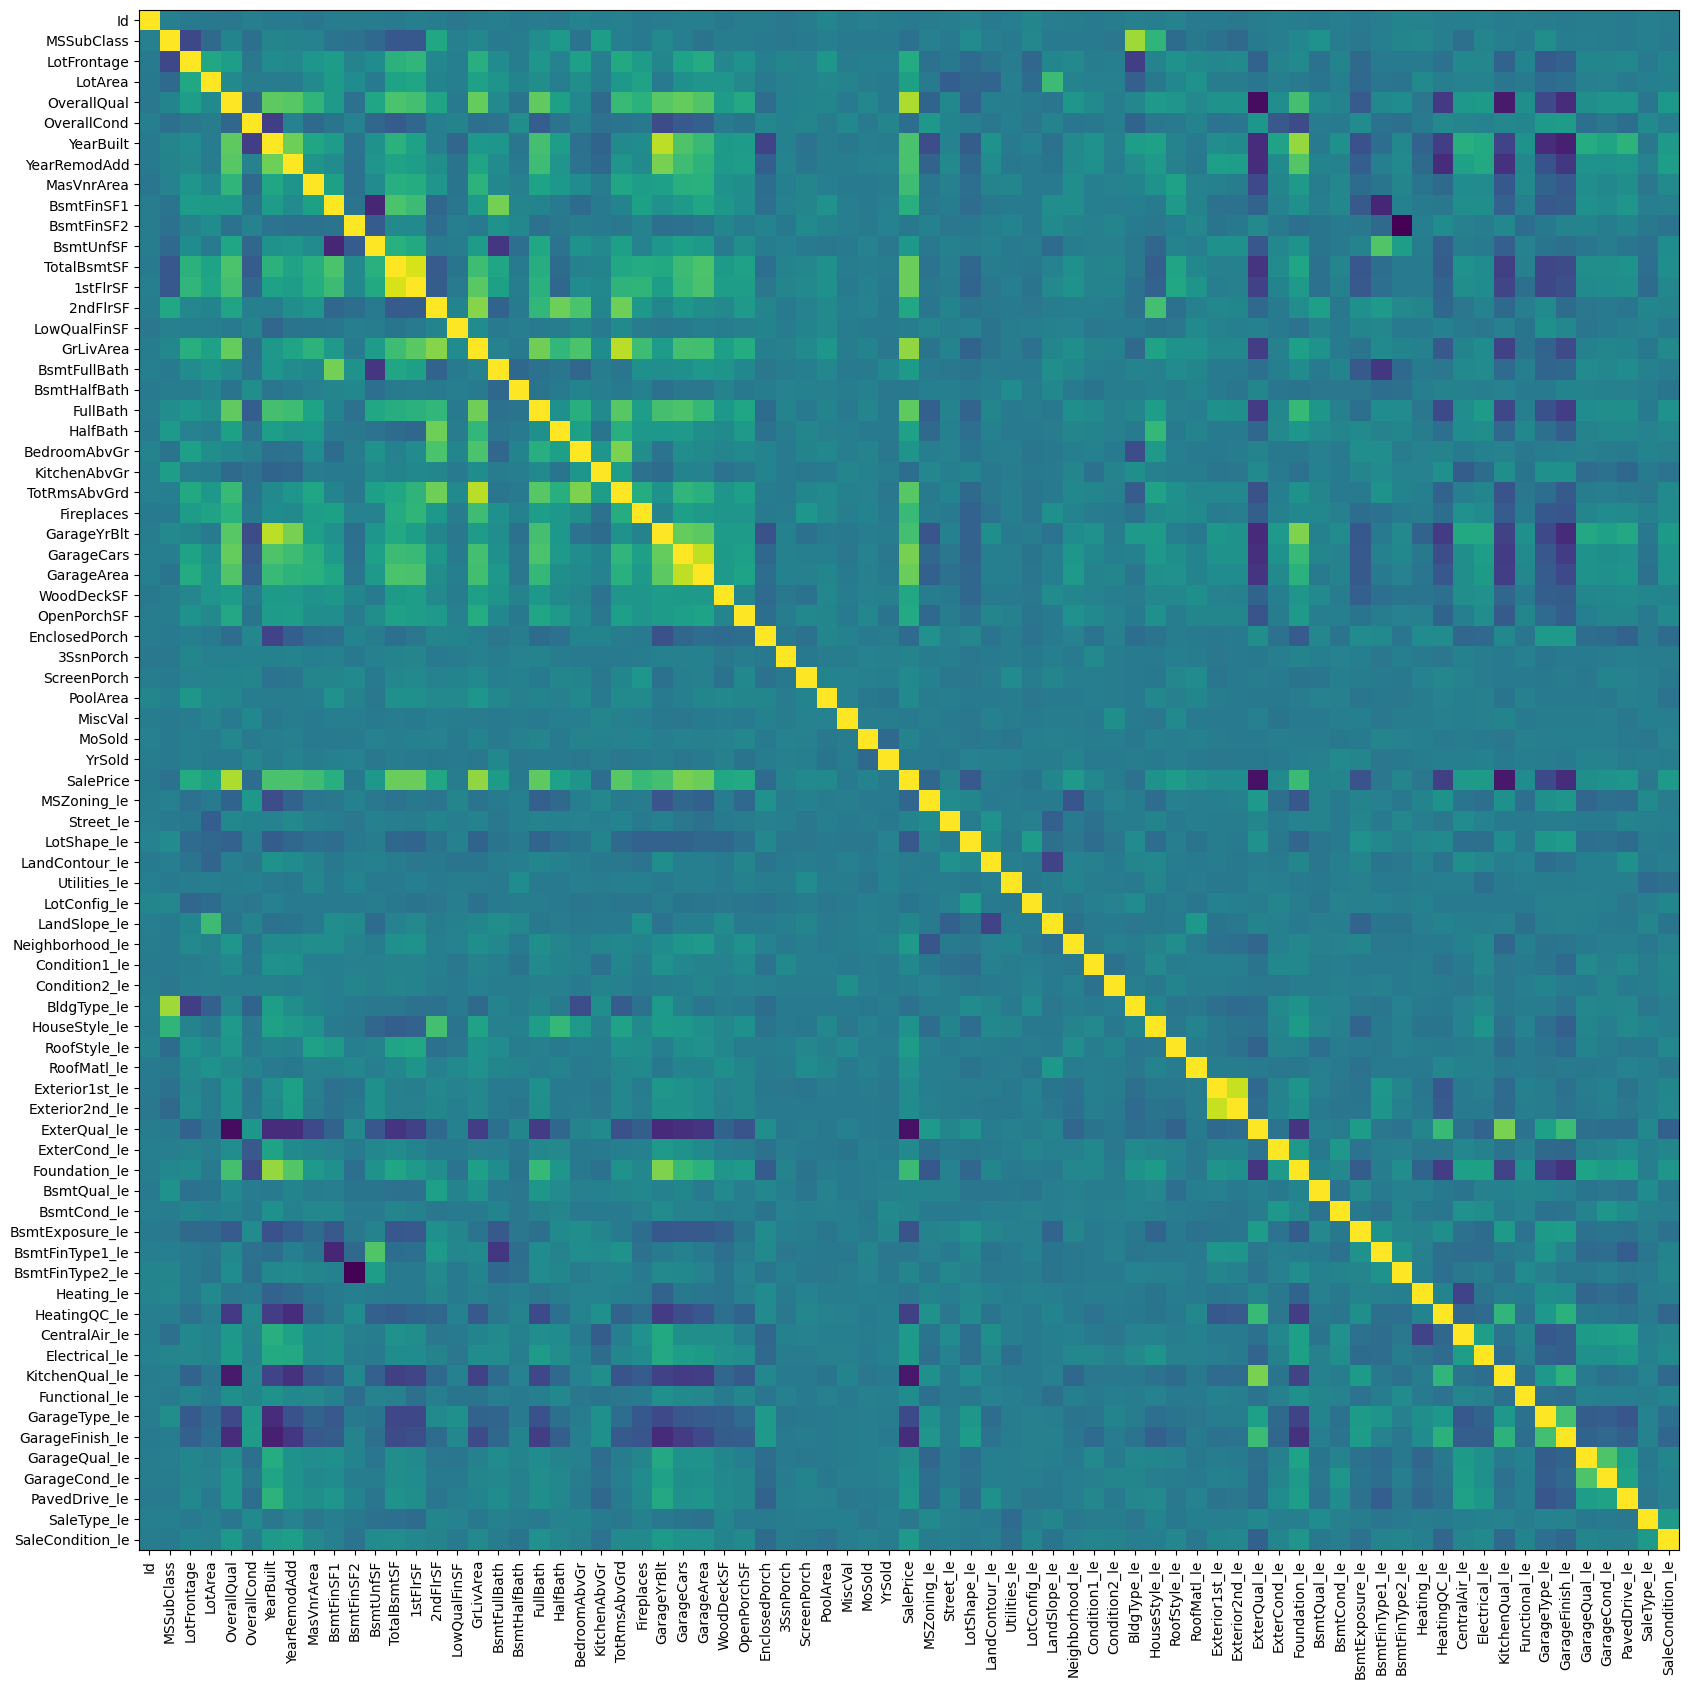

In [686]:
corr_mat = train.corr(numeric_only=True)
numeric_cols = [col for col in train.columns if train[col].dtype != 'object']

plt.figure(figsize=(20,20))
plt.imshow(corr_mat)
plt.xticks(ticks=range(len(numeric_cols)), labels=numeric_cols, rotation=90)
plt.yticks(ticks=range(len(numeric_cols)), labels=numeric_cols)
plt.show()

In [687]:
corr_scores = corr_mat['SalePrice']

corr_scores = corr_scores[(corr_scores >= 0.5) | (corr_scores <= -0.5)]

corr_scores


OverallQual        0.784499
YearBuilt          0.503686
YearRemodAdd       0.500745
TotalBsmtSF        0.602232
1stFlrSF           0.603425
GrLivArea          0.710031
FullBath           0.566750
TotRmsAbvGrd       0.548819
GarageCars         0.641048
GarageArea         0.608755
SalePrice          1.000000
ExterQual_le      -0.651067
KitchenQual_le    -0.619196
GarageFinish_le   -0.507940
Name: SalePrice, dtype: float64

In [688]:
# cols_corr_scores = corr_scores.index.tolist()

In [698]:
oh_columns= [ele.replace('_le', '') for ele in corr_scores.index if ele.endswith("_le")]

print(oh_columns)



['ExterQual', 'KitchenQual', 'GarageFinish']


In [690]:
for col in oh_columns:
    train = pd.concat([
        train,
        pd.get_dummies(train[col], dtype="int", prefix=col+'_')
    ], axis=1)



In [691]:

print(corr_scores)

OverallQual        0.784499
YearBuilt          0.503686
YearRemodAdd       0.500745
TotalBsmtSF        0.602232
1stFlrSF           0.603425
GrLivArea          0.710031
FullBath           0.566750
TotRmsAbvGrd       0.548819
GarageCars         0.641048
GarageArea         0.608755
SalePrice          1.000000
ExterQual_le      -0.651067
KitchenQual_le    -0.619196
GarageFinish_le   -0.507940
Name: SalePrice, dtype: float64


In [695]:
X = corr_scores.index[:10].to_list()
print(train.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       ...
       'ExterQual__Fa', 'ExterQual__Gd', 'ExterQual__TA', 'KitchenQual__Ex',
       'KitchenQual__Fa', 'KitchenQual__Gd', 'KitchenQual__TA',
       'GarageFinish__Fin', 'GarageFinish__RFn', 'GarageFinish__Unf'],
      dtype='object', length=123)


In [693]:

cat_vals = [[ele for ele in train.columns if ele.startswith(col+'__')] for col in oh_columns]

cat_vals


[['ExterQual__Ex', 'ExterQual__Fa', 'ExterQual__Gd', 'ExterQual__TA'],
 ['KitchenQual__Ex', 'KitchenQual__Fa', 'KitchenQual__Gd', 'KitchenQual__TA'],
 ['GarageFinish__Fin', 'GarageFinish__RFn', 'GarageFinish__Unf']]

In [694]:
Y = train['SalePrice']

train


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ExterQual__Fa,ExterQual__Gd,ExterQual__TA,KitchenQual__Ex,KitchenQual__Fa,KitchenQual__Gd,KitchenQual__TA,GarageFinish__Fin,GarageFinish__RFn,GarageFinish__Unf
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,1,0,0,0,1,0,0,1,0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,1,0,0,0,1,0,1,0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,1,0,0,0,1,0,0,1,0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,1,0,0,1,0,0,0,1
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,1,0,0,0,1,0,1,0
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,1,0,0,0,1,0,0,1
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,1,0,0,1,0
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,0,0,1,0,0,1,0,0,0,1
